<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/Clientes_Valida%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validação de Dados - BIUD

Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos importar a biblioteca que permite importar um dataset a partir de um link público do google.

In [2]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTi5WenuQ-d4Yqc8fa5IzD3Kmzhr-aelrqWjFvfIbT0N7TtiN1eB7b67uOl7XpKhVJCj_pWiccUZAgq/pub?gid=933925231&single=true&output=csv'

In [3]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,cpf,name,phone,email,gender,born_at,message_phone_validation,sum,count
0,6067546,37136033837,NaN,NaN,NaN,NaN,NaN,NaN,1252.96,32
1,6067547,27937442808,NaN,NaN,NaN,NaN,NaN,NaN,1609.60,32
2,6067551,37330528897,CHRISTINA DIAS PELISSARI VELLOSO,(11) 98530-9070,chrisitinapelissari@outlook.com,F,1987-08-31,O telefone é válido!,18364.16,256
3,6067552,12438607742,GIOVANNI TROTTA BONZOUMET,(21) 99220-1450,g_trotta@hotmail.com,M,1988-03-09,O telefone é válido!,26800.32,352
4,6067553,10985994894,MILTON CARVALHO COMIN,(11) 98509-0852,milton_ccomin@yahoo.com.br,M,1970-05-14,O telefone é válido!,20263.36,240
5,6067554,39517983867,NaN,NaN,NaN,NaN,NaN,NaN,503.36,16
6,6067555,10328085600,THAIS DE CASTRO TRINDADE,(19) 99507-8053,thathatrindade@gmail.com,F,1990-01-19,O telefone é válido!,18225.44,528
7,6067556,51381627803,NaN,NaN,NaN,NaN,NaN,NaN,8654.40,208
8,6067557,43051325830,LUCAS HENRIQUE MARIANO CUSTODIO,(11) 95123-9574,lucas_henrique44@hotmail.com,M,1992-11-01,O telefone é válido!,7117.92,80
9,6067558,39137099833,BRUNO LOPES SILVA,(11) 93489-9279,brunolincol@hotmail.com,M,1991-09-17,O telefone é válido!,3017.60,48


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [4]:
# Mostra as dimensões do dataset
dataset.shape

(193626, 10)

In [12]:
# tentativa de contar único
dataset.count()

id                          193626
cpf                         193626
name                         16584
phone                        14743
email                        13578
gender                       14111
born_at                      15143
message_phone_validation     24211
sum                         193626
count                       193626
dtype: int64

In [5]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193626 entries, 0 to 193625
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193626 non-null  int64  
 1   cpf                       193626 non-null  int64  
 2   name                      16584 non-null   object 
 3   phone                     14743 non-null   object 
 4   email                     13578 non-null   object 
 5   gender                    14111 non-null   object 
 6   born_at                   15143 non-null   object 
 7   message_phone_validation  24211 non-null   object 
 8   sum                       193626 non-null  float64
 9   count                     193626 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 14.8+ MB


In [15]:
# Verifica a distribuição por telefones válidos
dataset.groupby('message_phone_validation').size()

message_phone_validation
O numero possui muitos digitos repetidos!        2
O telefone é válido!                         14740
Os digitos iniciais não são válidos!          9469
dtype: int64

In [19]:
# Verifica a distribuição por quantidade
dataset.groupby('count').size()

count
16      120653
32       30114
48       13669
64        7580
80        4960
         ...  
2976         1
3216         1
3504         1
3680         1
5024         1
Length: 121, dtype: int64

In [11]:
# Verificando as propriedades estatísticas do dataset
dataset.describe()

,id,cpf,sum,count
count,1.936260e+05,1.936260e+05,193626.000000,193626.000000
mean,7.527242e+06,3.249025e+10,2178.182264,39.825974
std,9.673883e+05,1.665504e+10,5074.505769,72.470790
min,6.067546e+06,1.910000e+02,-192.000000,16.000000
25%,6.654570e+06,2.200688e+10,535.360000,16.000000
50%,8.311138e+06,3.592678e+10,933.280000,16.000000
75%,8.365069e+06,4.280212e+10,1950.680000,32.000000
max,9.012635e+06,9.999941e+10,323536.000000,5024.000000


In [6]:
# verificando nulls no dataset
dataset.isnull().sum()

id                               0
cpf                              0
name                        177042
phone                       178883
email                       180048
gender                      179515
born_at                     178483
message_phone_validation    169415
sum                              0
count                            0
dtype: int64

<Axes: >

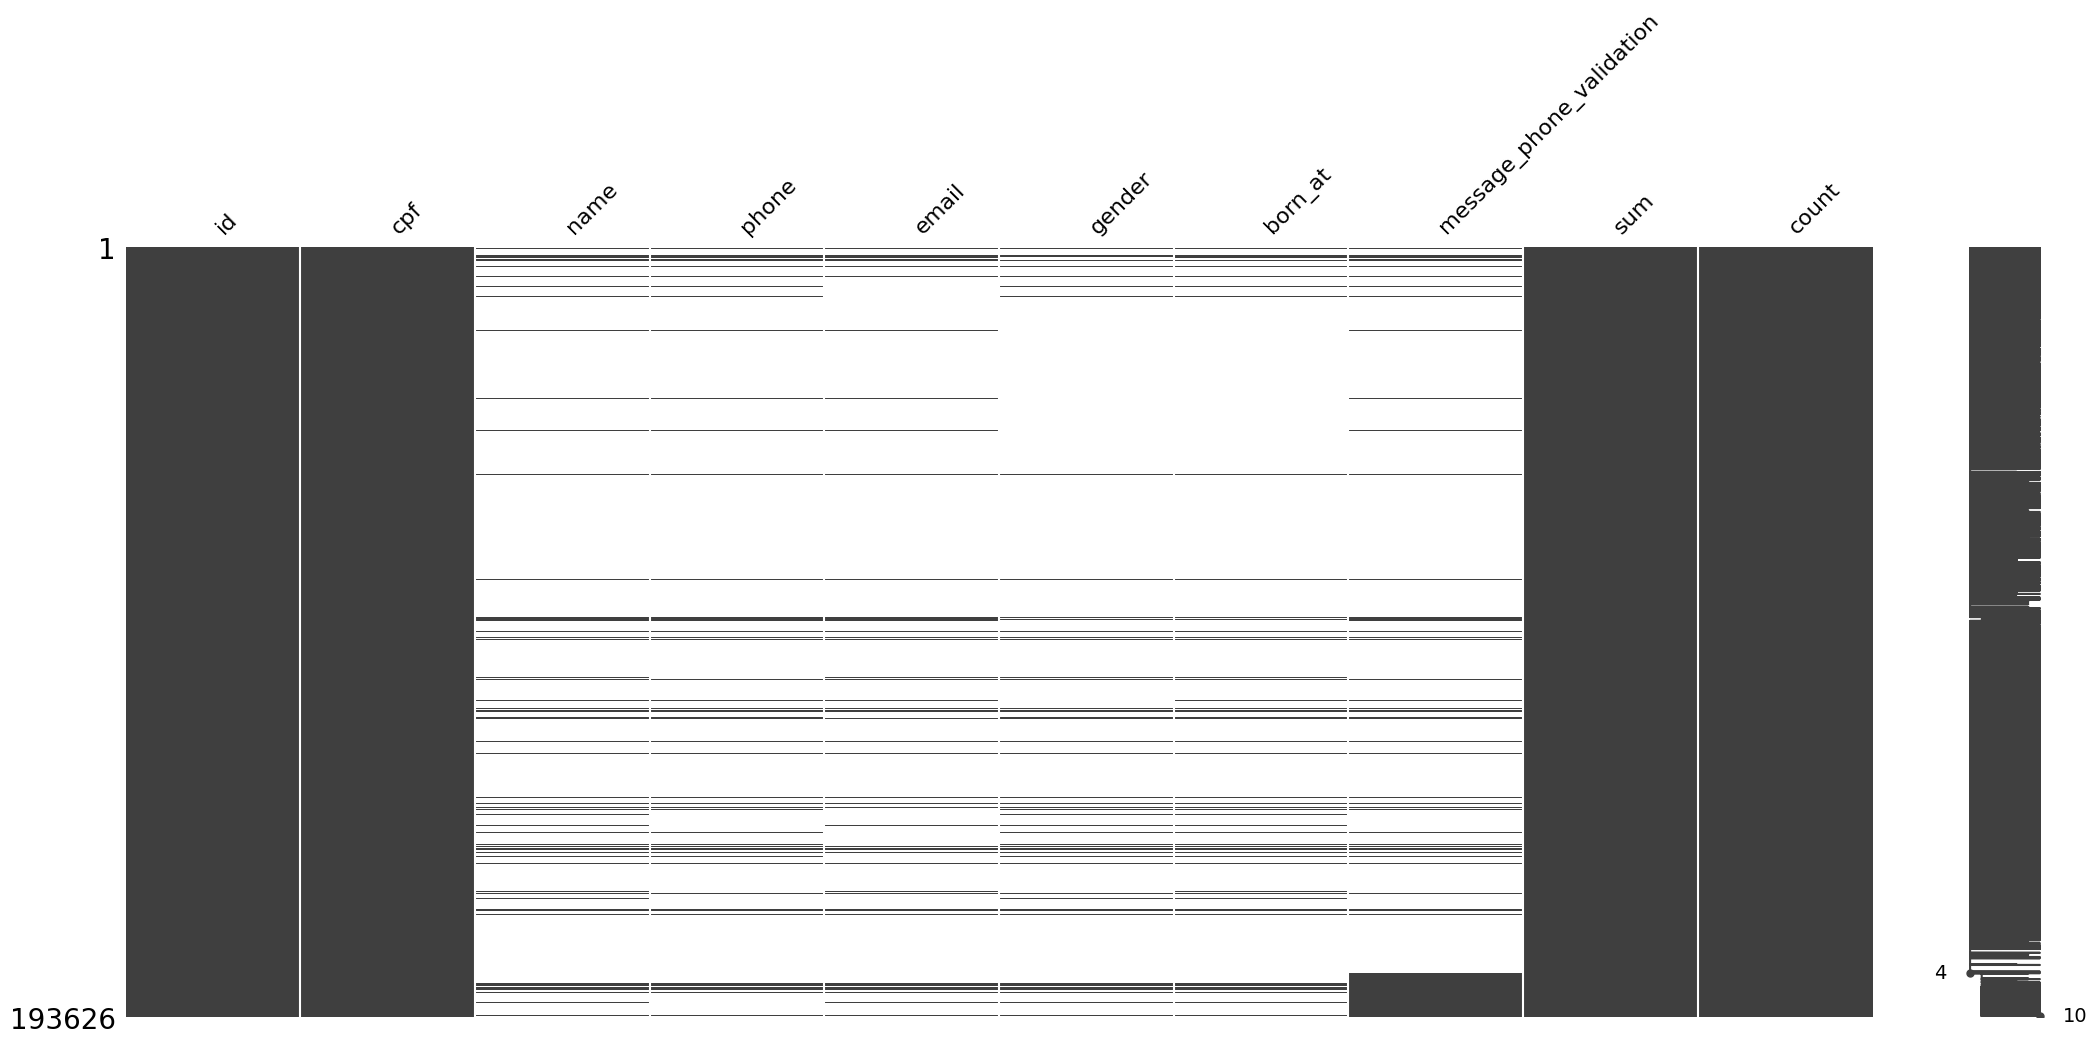

In [13]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataset)

Inicialmente, conseguimos observar que existem 193.626 IDs únicos na base de dados. Além disso, podemos observar que existem cerca de 14 mil clientes com telefone. Por fim, inicialmente, nenhum cliente possui um valor total de vendas zeradas ou quantidade de compras zeradas.
Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na.

<Axes: >

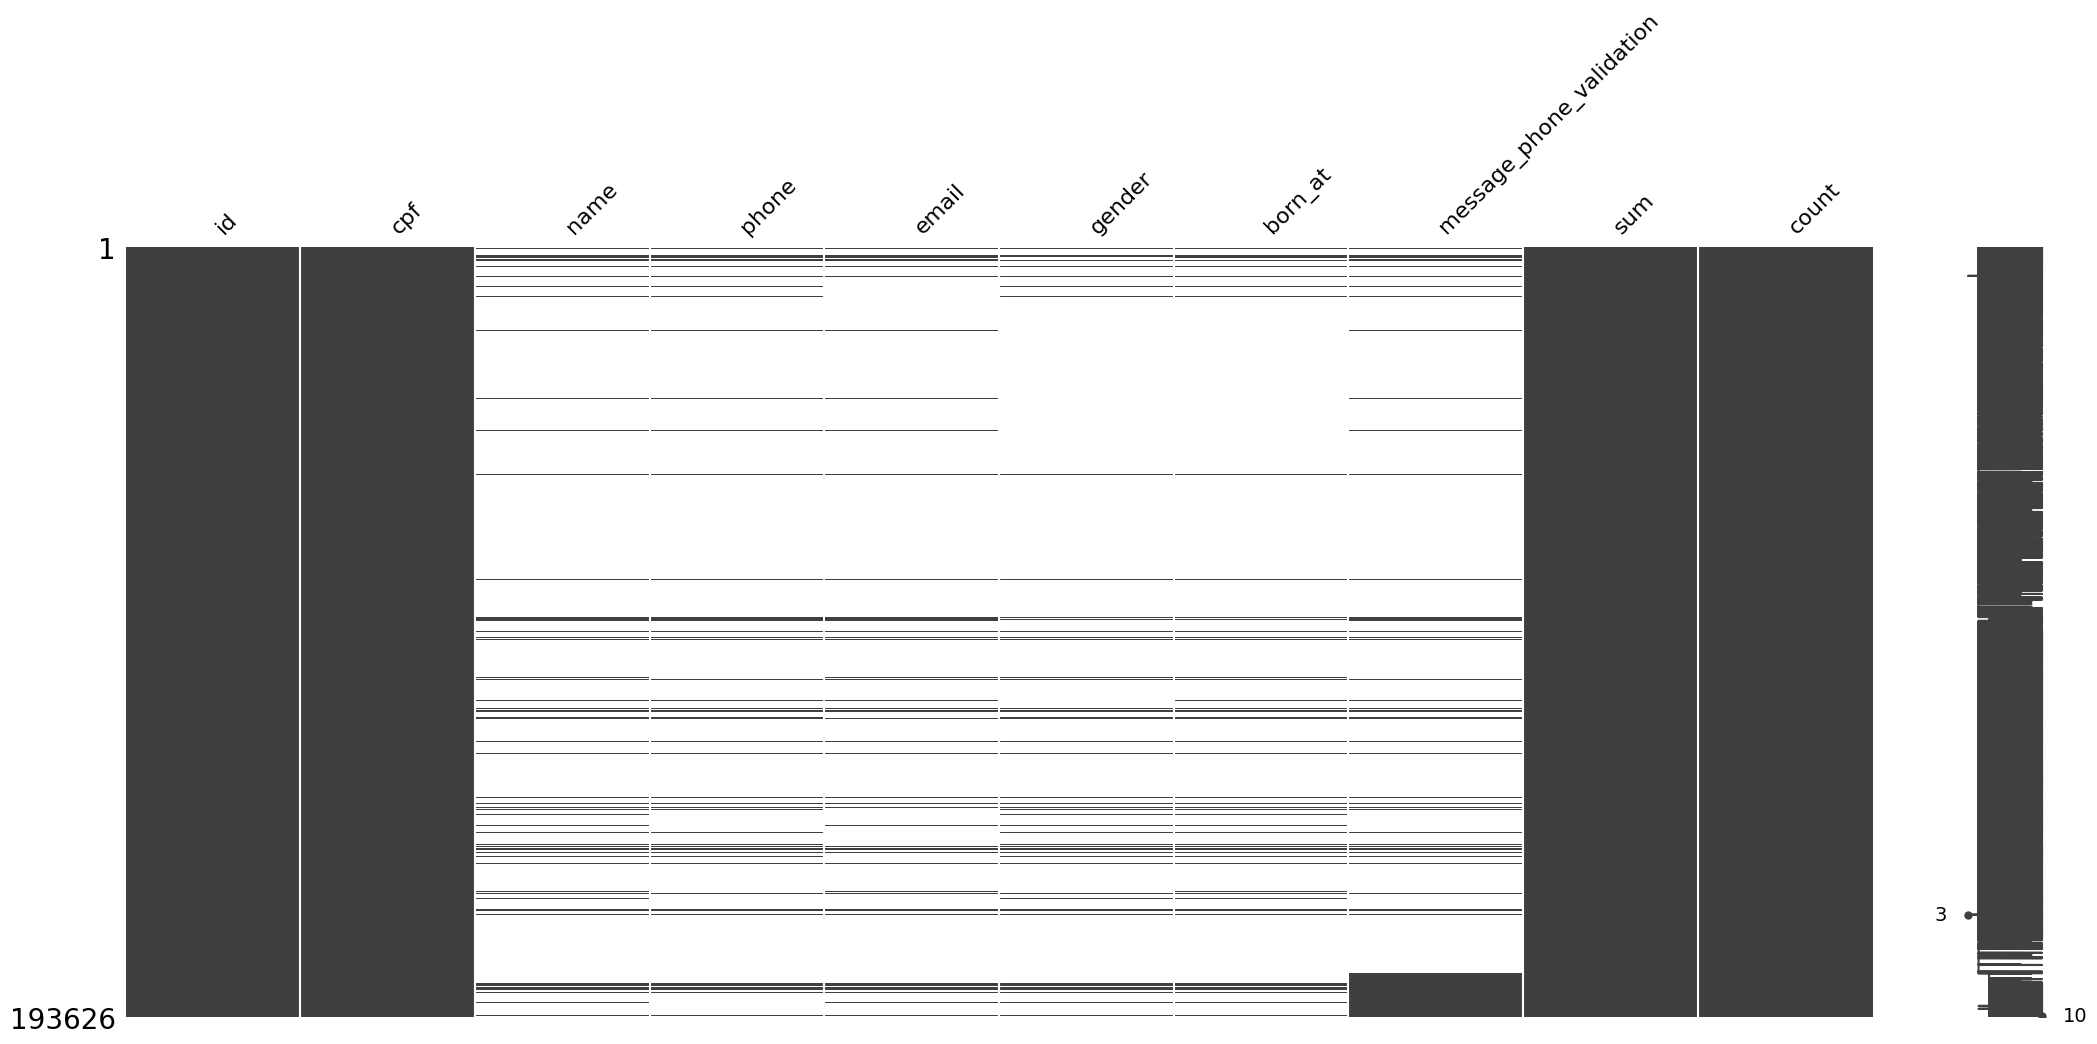

In [7]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
crek = dataset[col[:]]

# substituindo os zeros por NaN
crek.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(crek)

In [8]:
# verificando nulls no dataset
crek.isnull().sum()

id                               0
cpf                              0
name                        177042
phone                       178883
email                       180048
gender                      179515
born_at                     178483
message_phone_validation    169415
sum                              6
count                            0
dtype: int64

Com essa visualização, podemos observar que existem valores agora considerados nulo no Dataset transformado. Com isso, podemos concluir que, aqui, existem valores abaixo de zero, ainda que não existam valores negativos nas quantidades vendidas.


## 1.2 Visualizações Unimodais

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id e Total_valeu.

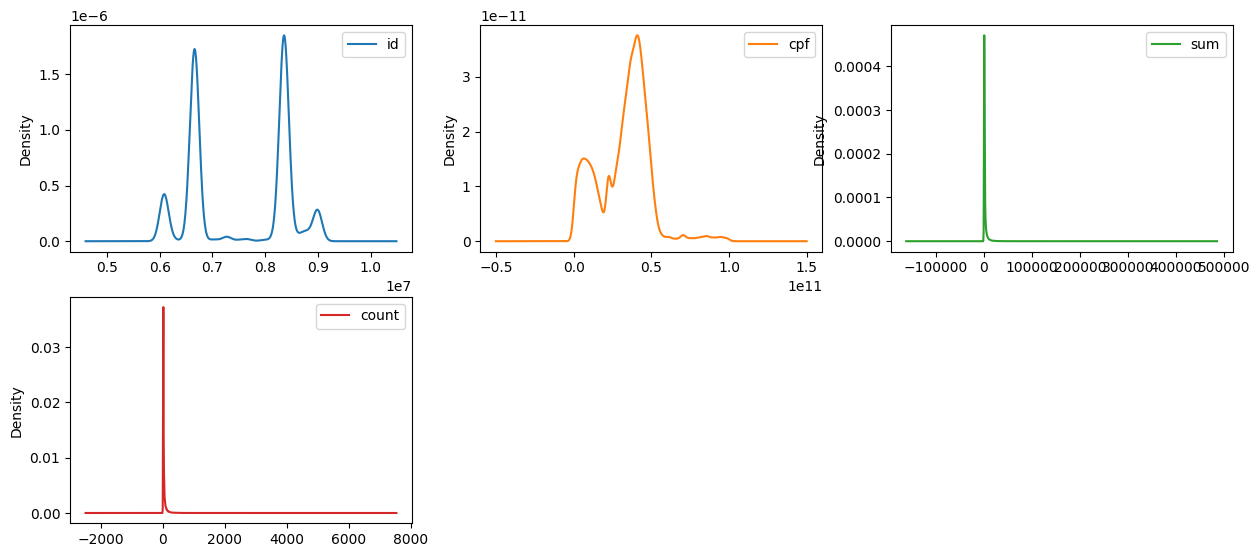

In [14]:
# Density Plot
crek.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

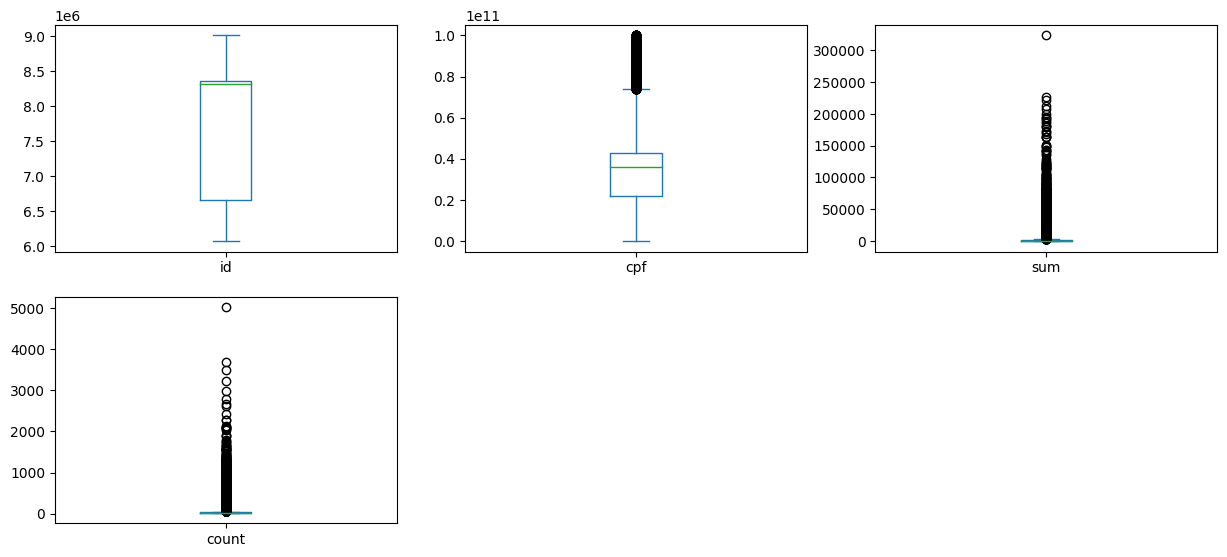

In [10]:
# Boxplot
crek.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A partir do gráfico de desindade, temos uma outra visualização no problema clientes com o valor total negativo ou muito acima do desvio padrão. Com isso, podemos concluir que existe alguns pontos que precisam ser melhor abordados na investigação de dados.
